# CODEC - Detecting Linear Corrleations in Dense Clusters with CoMad PCA

---

When  reading  the  word  comedian  one  probably  expects  a
scientific decompostion of the entertainment industry. But in context of
statistic and data mining, the comedian refers to a measure for the joint
median of two random variables. In this preliminary work we introduce
CODEC - COrrelations in DEnse Clusters - a method for detecting lin-
ear correlations in dense clusters utilizing a comedian-based PCA. The
idea of CODEC is intriguingly simple: first a density-based clustering is
performed using the well established clustering method DBSCAN. Then
on each of the clusters PCA is performed. Instead of using the covari-
ance matrix we use the comedian matrix as a basis for performing PCA.
The experiments show that a comedian-based PCA is more robust to-
wards noise and outliers, yielding eigenvectors which represent the linear
correlation better than its covariance-based competitor

## Implementation

Here is the Code that was used to create and run the example found in the paper - [LINK NOT AVAILBLE]

### Required Libraries

In [153]:
from itertools import chain
import random
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data Generator

In [5]:
def generate_clusters(Xs, m, t, noise, spread):
    X = []
    Y = []
    for i in Xs:
        X.append(i)
        Y.append(m * i + t + (noise*random.random() - spread))
    return X, Y

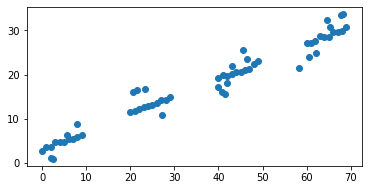

In [229]:
m=0.4
t=3
X=[]
Y=[]
for i in chain(range(0,10),range(20,30), range(40,50), range(60,70)):
   X.append(i)
   Y.append(m*i + t+(random.random()-0.5))
for i in chain(range(5,8, 2),range(21,24, 1), range(43,49, 2), range(65,69, 1)):
   X.append(i+(2*random.random()-1))
   Y.append(m*i + t+3+(4*random.random()-2))
for i in chain(range(2, 4, 1), range(27, 29, 2), range(39, 43, 1), range(58, 63, 2)):
   X.append(i+(2*random.random()-1))
   Y.append(m*i + t-3 + (4*random.random()-2))

plt.scatter(X, Y)
ax = plt.axes()
ax.set_aspect('equal', 'box')
plt.show()

### Clustering

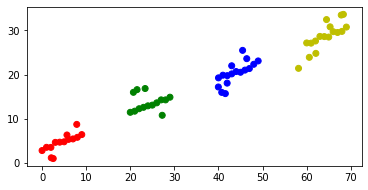

In [243]:
data = pd.DataFrame({'X': X, 'Y': Y})
dbscan = DBSCAN(eps=9, min_samples=9)
dbscan.fit(data)

data["labels"] = dbscan.labels_

from sklearn.decomposition import PCA

LABEL_COLOR_MAP = {0: 'r',
                   1: 'g',
                   2: 'b',
                   3: 'y',
                   4: 'm',
                   5: 'c',
                   -1: 'k'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in data['labels']]
plt.scatter(X, Y, c=label_color)
ax = plt.axes()
ax.set_aspect('equal', 'box')

### Perform Standard PCA

[11.2782308   1.13318016]
[[ 0.82654827  0.56286584]
 [ 0.56286584 -0.82654827]]
[8.66354088 3.64023494]
[[ 0.99954627  0.03012078]
 [-0.03012078  0.99954627]]
[13.20523356  1.85415259]
[[ 0.74349856  0.66873754]
 [-0.66873754  0.74349856]]
[19.55673169  1.6801929 ]
[[-0.70493933 -0.70926761]
 [-0.70926761  0.70493933]]


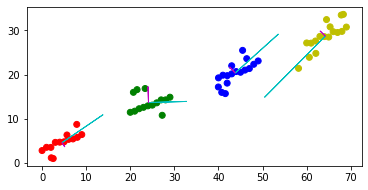

In [244]:
pca = PCA()
plt.scatter(X, Y, c=label_color)
ax = plt.axes()
ax.set_aspect('equal', 'box')

for label in data['labels'].unique():
    pca.fit(data.loc[data['labels'] == label].drop(columns=['labels'], axis=1))
    ax.arrow(pca.mean_[0], pca.mean_[1], pca.components_[0][0] * pca.explained_variance_[0], pca.components_[0][1] * pca.explained_variance_[0], color='c')
    ax.arrow(pca.mean_[0], pca.mean_[1], pca.components_[1][0] * pca.explained_variance_[1], pca.components_[1][1] * pca.explained_variance_[1], color='m')
    print(pca.explained_variance_)
    print(pca.components_)
    
plt.show()

### CoMAD PCA

In [213]:
def comedian(data):
    data_sub = data.sub(data.median(axis=0), axis=1)
    temp_list = []
    for x in range(0, data.shape[1]):
        row = []
        for y in range(0, data.shape[1]):
            column_name_1 = data_sub.keys()[x]
            column_name_2 = data_sub.keys()[y]
            mul = data_sub.loc[:, column_name_1] * data_sub.loc[:, column_name_2]
            row.append(mul.median())
        temp_list.append(pd.Series(row))
    coMAD = pd.DataFrame(temp_list)
    return coMAD

def sortSecond(val):
    return val[0]

def comPCA(data):
    data = pd.DataFrame(data)
    CM = comedian(data)
    # compute eigenvalues and eigenvectors
    w, v = np.linalg.eig(CM)

    temp = list(zip(w, v.T))
    temp.sort(key=sortSecond, reverse=True)

    eigenvalues = []
    eigenvectors = []
    for t in temp:
        eigenvalues.append(t[0])
        eigenvectors.append(t[1])

    w = eigenvalues
    v = np.asarray(eigenvectors)

    return w, v

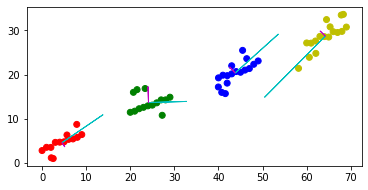

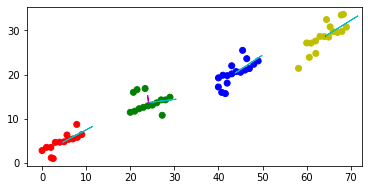

In [263]:
pca = PCA()
plt.scatter(X, Y, c=label_color)
ax = plt.axes()
ax.set_aspect('equal', 'box')

for label in data['labels'].unique():
    pca.fit(data.loc[data['labels'] == label].drop(columns=['labels'], axis=1))
    ax.arrow(pca.mean_[0], pca.mean_[1], pca.components_[0][0] * pca.explained_variance_[0], pca.components_[0][1] * pca.explained_variance_[0], color='c')
    ax.arrow(pca.mean_[0], pca.mean_[1], pca.components_[1][0] * pca.explained_variance_[1], pca.components_[1][1] * pca.explained_variance_[1], color='m')
    
plt.show()

plt.scatter(X, Y, c=label_color)
ax = plt.axes()
ax.set_aspect('equal', 'box')

for label in data['labels'].unique():
    eigenvalues, eigenvectors = comPCA(data.loc[data['labels'] == label].drop(columns=['labels'], axis=1))
    ax.arrow(data.loc[data['labels'] == label].mean()[0], data.loc[data['labels'] == label].mean()[1], eigenvectors[0][0] * eigenvalues[0], eigenvectors[0][1] * eigenvalues[0], color='c')
    ax.arrow(data.loc[data['labels'] == label].mean()[0], data.loc[data['labels'] == label].mean()[1], eigenvectors[1][0] * eigenvalues[1], eigenvectors[1][1] * eigenvalues[1], color='m')